Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Best Parameters (Grid Search): {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}


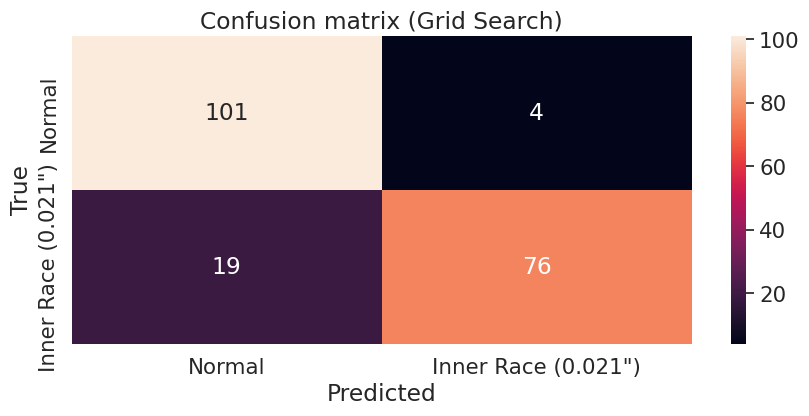

Classification Report (Grid Search):                      precision    recall  f1-score   support

             Normal       0.84      0.96      0.90       105
Inner Race (0.021")       0.95      0.80      0.87        95

           accuracy                           0.89       200
          macro avg       0.90      0.88      0.88       200
       weighted avg       0.89      0.89      0.88       200

Best Parameters (Random Search): {'kernel': 'rbf', 'gamma': 'auto', 'C': 100}
DE: -0.771566866
FE: 0.098207273
Predictions using Grid Search: [ True]
Predictions using Random Search: [ True]


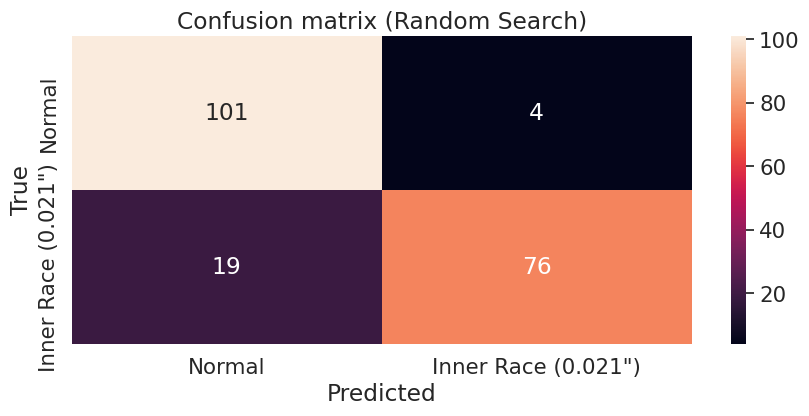

Classification Report (Random Search):                      precision    recall  f1-score   support

             Normal       0.84      0.96      0.90       105
Inner Race (0.021")       0.95      0.80      0.87        95

           accuracy                           0.89       200
          macro avg       0.90      0.88      0.88       200
       weighted avg       0.89      0.89      0.88       200



In [5]:
# Importing necessary packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Mount Google Drive if not already mounted
from google.colab import drive
drive.mount('/content/drive')

# Load the dataset
dataset = pd.read_csv("/content/drive/MyDrive/project files/finalfile (1).csv")

# Sample a subset of the dataset (adjust the sample size as needed)
sampled_dataset = dataset.sample(n=1000, random_state=0)

# Separate features (x) and target variable (y)
x = sampled_dataset.drop(columns=["fault"])
y = sampled_dataset["fault"]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

# Standardize or normalize input features
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Define a parameter grid to search
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto', 1, 0.1, 0.01, 0.001], 'kernel': ['linear', 'poly', 'rbf', 'sigmoid']}

# Create the SVM model
svm_classifier = SVC(random_state=0)

# Perform grid search with cross-validation
grid_search = GridSearchCV(svm_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params_grid = grid_search.best_params_
print("Best Parameters (Grid Search):", best_params_grid)

# Train the SVM model with the best parameters from grid search
svm_classifier_best_grid = SVC(**best_params_grid, random_state=0)
svm_classifier_best_grid.fit(X_train, y_train)

# Make predictions on the test set
y_pred_grid = svm_classifier_best_grid.predict(X_test)

# Evaluate the model from grid search
cm_grid = confusion_matrix(y_test, y_pred_grid)

index = ['Normal', 'Inner Race (0.021")']
columns = ['Normal', 'Inner Race (0.021")']
cm_df_grid = pd.DataFrame(cm_grid, columns, index)

plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(cm_df_grid, annot=True, fmt='g')  # font size
plt.title('Confusion matrix (Grid Search)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report from grid search
cr_grid = classification_report(y_test, y_pred_grid, target_names=['Normal', 'Inner Race (0.021")'])
print("Classification Report (Grid Search):", cr_grid)

# Perform randomized search with cross-validation
random_search = RandomizedSearchCV(svm_classifier, param_distributions=param_grid, n_iter=10, cv=5, random_state=0)
random_search.fit(X_train, y_train)

# Get the best parameters from randomized search
best_params_random = random_search.best_params_
print("Best Parameters (Random Search):", best_params_random)

# Train the SVM model with the best parameters from randomized search
svm_classifier_best_random = SVC(**best_params_random, random_state=0)
svm_classifier_best_random.fit(X_train, y_train)

# Make predictions on the new data using the best model from grid search
a=float(input("DE: "))
b=float(input("FE: "))
y_new = np.array([[a, b]])
new_pred_grid = svm_classifier_best_grid.predict(y_new)
new_pred_grid = (new_pred_grid > 0.5)
print("Predictions using Grid Search:", new_pred_grid)

# Make predictions on the new data using the best model from randomized search
new_pred_random = svm_classifier_best_random.predict(y_new)
new_pred_random = (new_pred_random > 0.5)
print("Predictions using Random Search:", new_pred_random)

# Make predictions on the test set using the best model from randomized search
y_pred_random = svm_classifier_best_random.predict(X_test)

# Evaluate the model from randomized search
cm_random = confusion_matrix(y_test, y_pred_random)

cm_df_random = pd.DataFrame(cm_random, columns, index)

plt.figure(figsize=(10, 4))
sn.set(font_scale=1.4)  # for label size
sn.heatmap(cm_df_random, annot=True, fmt='g')  # font size
plt.title('Confusion matrix (Random Search)')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Print the classification report from randomized search
cr_random = classification_report(y_test, y_pred_random, target_names=['Normal', 'Inner Race (0.021")'])
print("Classification Report (Random Search):", cr_random)
